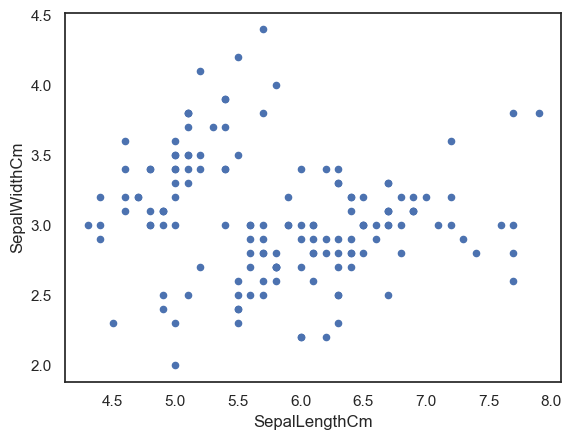

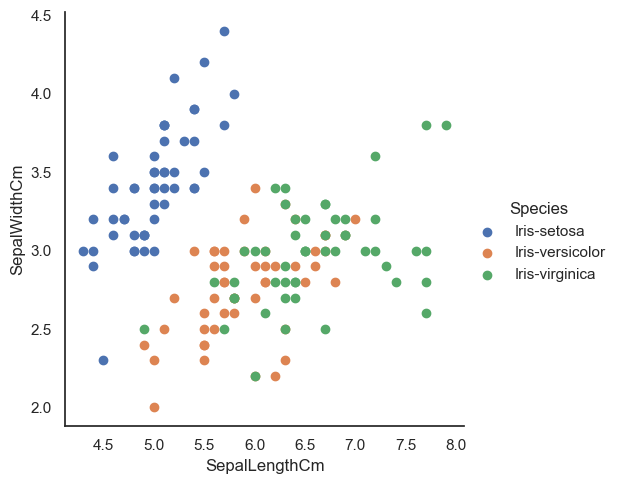

Accuracy: 97.78%
Accuracy: 100.00%


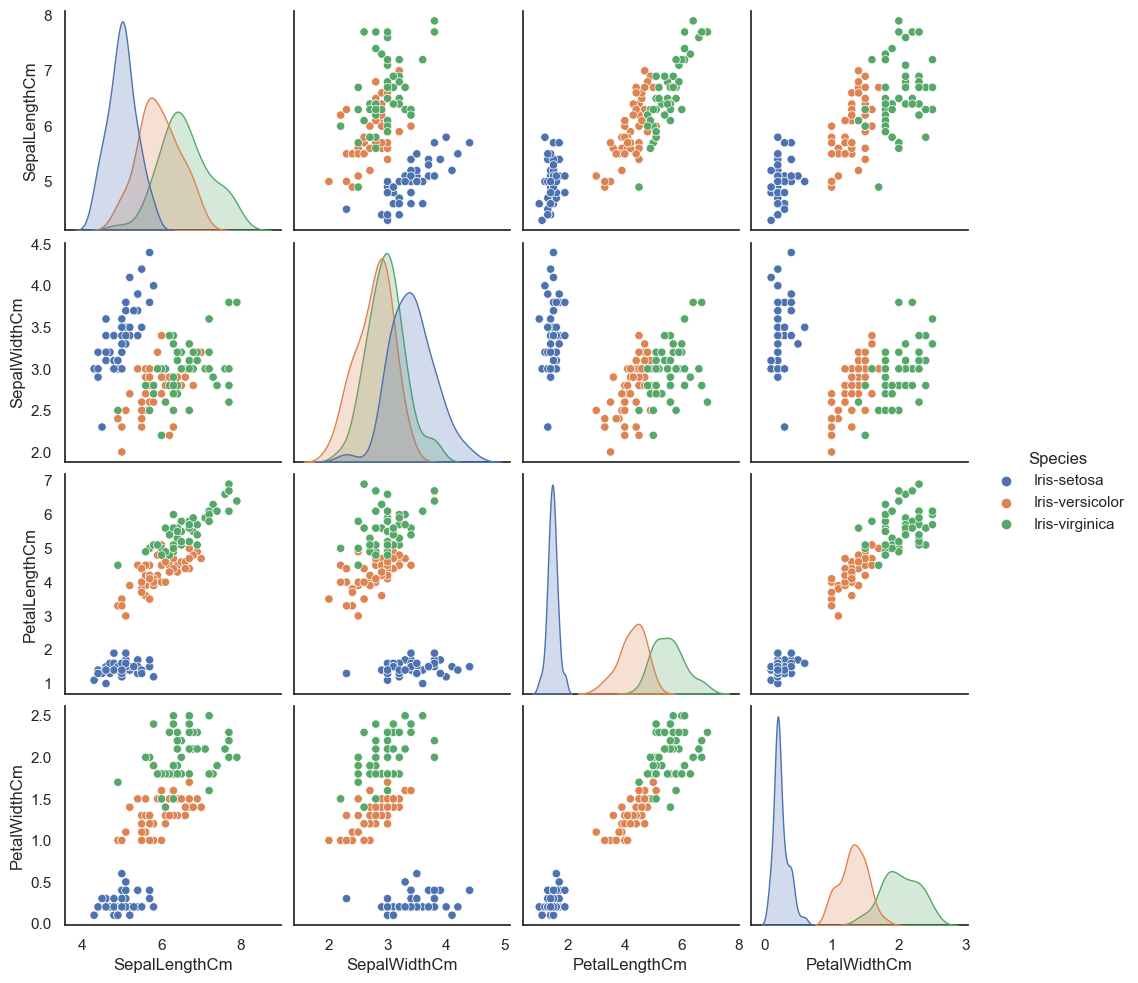

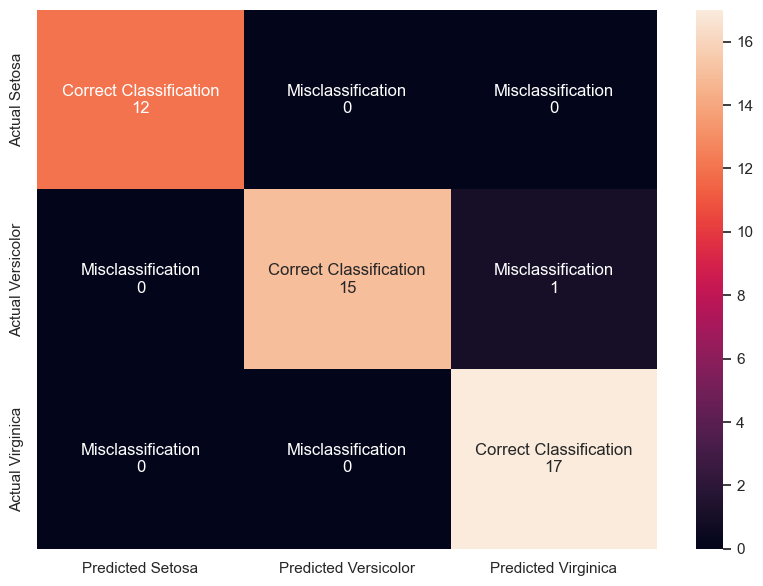

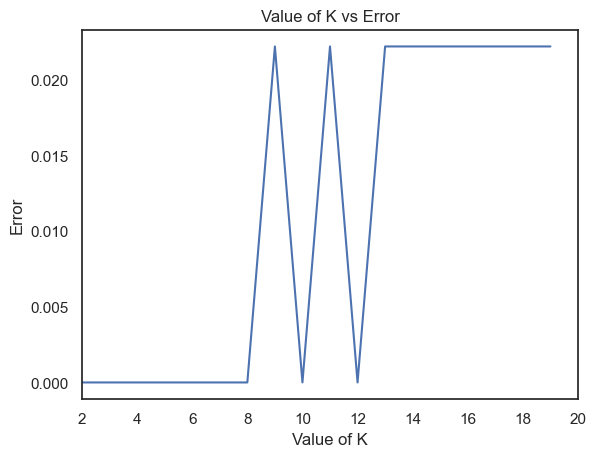

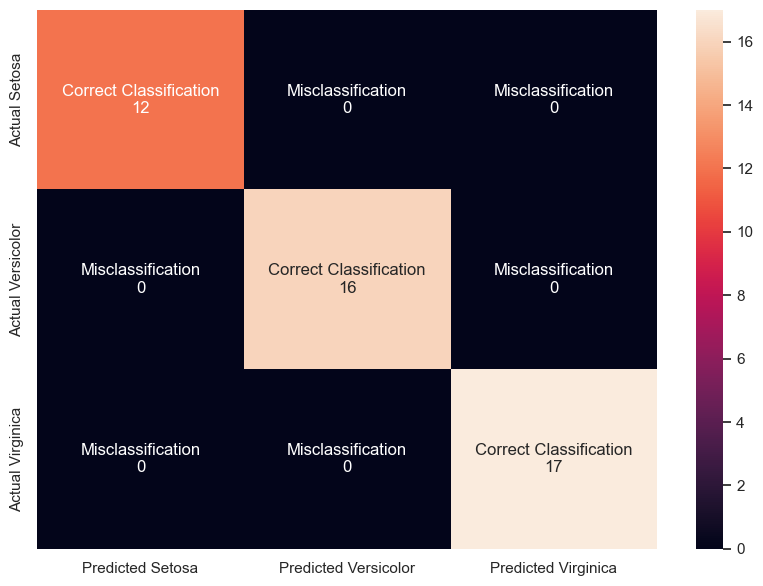

In [41]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes= True)

iris = pd.read_csv("C:\\Users\\user\\Desktop\\iris\\Iris.csv")

#Voir les data d'Iris
iris.head()

#échantillons de tous les espèces
iris["Species"].value_counts()

#Affichage des points
iris.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

#Separer les couleurs selon les espèces
sns.FacetGrid(iris, hue= "Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show()


#Régression logistiue 

#initialiasation des bins
bins = [4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]

#grouper les données numériue en catégorie
iris['sepal_length'] = pd.cut(iris.SepalLengthCm, bins)

#initialiasation des bins
bins = [2.0, 2.4, 2.8, 3.2, 3.6, 4.0, 4.4]

#grouper les données numériue en catégorie
iris['sepal_width'] = pd.cut(iris.SepalWidthCm, bins)

#initializing the bins bins
bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

#grouper les données numériue en catégorie
iris['petal_length'] = pd.cut(iris.PetalLengthCm, bins)

#initializing the bins bins
bins = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]

#grouper les données numériue en catégorie
iris['petal_width'] = pd.cut(iris.PetalWidthCm, bins)

#Génération de points se basant sur les espèces
sns.pairplot(data=iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']], hue='Species')


#Division des données en variables dépendantes et indépendantes
x = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris['Species']

#diviser la dataset en training set et testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=105)

from sklearn.linear_model import LogisticRegression

# Construction du model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)


# prédiction à partir testing set
y_pred = logreg.predict(x_test)


from sklearn.metrics import confusion_matrix

# obtaining the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# preparing the labels
labels = ['Correct Classification', 'Misclassification', 'Misclassification', 
          'Misclassification', 'Correct Classification', 'Misclassification', 
          'Misclassification', 'Misclassification', 'Correct Classification']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(3,3)
axxlabels = ['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica']
axylabels = ['Actual Setosa', 'Actual Versicolor', 'Actual Virginica']

# plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)


# obtaining the accuracy of the model
print(str.format('Accuracy: {:.2f}%', logreg.score(x_test, y_test)*100))

#KNN


from sklearn.neighbors import KNeighborsClassifier
error = []

# iterating over the value of k and building models
for k in range(2,20):    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred!=y_test))

#Pour un bon choix de k < 8, ou =10 ou =12 
# plotting the variation of error with the value of k
plt.figure()
sns.lineplot(x=range(2,20), y=error)
plt.title('Value of K vs Error')
plt.xlabel('Value of K')
plt.xlim(2,20)
plt.ylabel('Error')

# building the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# predicting from testing set
y_pred = knn.predict(x_test)

from sklearn.metrics import confusion_matrix

# obtaining the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# preparing the labels
labels = ['Correct Classification', 'Misclassification', 'Misclassification', 
          'Misclassification', 'Correct Classification', 'Misclassification', 
          'Misclassification', 'Misclassification', 'Correct Classification']
values = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
annotations = [f'{v1}\n{v2}' for v1, v2 in zip(labels, values)]
annotations = np.asarray(annotations).reshape(3,3)
axxlabels = ['Predicted Setosa', 'Predicted Versicolor', 'Predicted Virginica']
axylabels = ['Actual Setosa', 'Actual Versicolor', 'Actual Virginica']

# plotting the heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cf_matrix, annot=annotations, fmt='', xticklabels=axxlabels, yticklabels=axylabels)

# obtaining the accuracy of the model
print(str.format('Accuracy: {:.2f}%', knn.score(x_test, y_test)*100))